<a href="https://colab.research.google.com/github/NajdBinrabah/Deep-Learning-with-TensorFlow-and-Keras/blob/main/Deep_Learning_with_TensorFlow_%26_Keras_Emotion_Detection_in_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning with TensorFlow & Keras: Emotion Detection in Audio**

##Context

The exponential growth of data presents an immense opportunity for exploration, particularly as we encounter a diversity of formats previously unimaginable. This vast landscape unlocks a new level of freedom, especially in working with Machine Learning, which thrives on the abundance of data.

Within this landscape, Deep Learning has captured my attention, fueled by both the powerful libraries that enable its practical deployment and the diverse forms of data available, from text to images, and even audio. As my interest naturally evolved, I found myself drawn to the possibilities presented by audio data, a domain I have yet to explore in depth.

In this project, my aim is to address an audio classification problem using Deep Learning, implemented through TensorFlow and Keras. Additionally, I will incorporate Librosa, a library specialized in audio analysis, to extract meaningful insights from the data. This endeavour marks a step forward in deepening my understanding of audio-based datasets.



---



##References

- Dataset - https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess/data



---



##Importing Libraries and Loading the Dataset

In [ ]:
# Install the librosa library for audio and music analysis
!pip install librosa

In [ ]:
# Importing librosa for audio processing
import librosa
import librosa.display as dsp

# Importing functions to play and display audio
from IPython.display import Audio, display

# Importing essential libraries for data handling and numerical computations
import pandas as pd
import numpy as np

# Importing os for file system and system-specific parameters
import os
import sys

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization
import seaborn as sns

# Importing plotly for interactive plots
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Importing tqdm for progress bar display
from tqdm import tqdm

# Importing tensorflow for building deep learning models
import tensorflow as tf

# Importing various Keras components for building LSTM models
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LSTM, Activation, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Importing Keras callbacks for model training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Importing functions to load pre-trained models
from tensorflow.keras.models import load_model

# Importing scikit-learn tools for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Suppressing warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Setting seaborn plot style to dark theme
sns.set_style("dark")

In [ ]:
# Installing the Kaggle package via pip for dataset access
!pip install kaggle

In [ ]:
# Set up Kaggle API configuration
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the TESS dataset from Kaggle
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

cp: cannot stat '/content/drive/MyDrive/Kaggle_API/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:20<00:00, 22.7MB/s]
100% 428M/428M [00:20<00:00, 22.2MB/s]


In [ ]:
# Unzip the dataset into the created directory
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 



---



**Understanding the data by viewing a few observations**

In [ ]:
# Defining the file path for the TESS dataset
TESS = "/content/TESS Toronto emotional speech set data"

In [ ]:
# Collecting all .wav files from the TESS dataset into a list
tess_files = []
for emotion_folder in os.listdir(TESS):
    folder_path = os.path.join(TESS, emotion_folder)
    if os.path.isdir(folder_path):
        # Adding the full path of .wav files to the list
        tess_files.extend([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')])

# Creating a DataFrame with file paths and associated emotion labels
tess_df = pd.DataFrame({
    'path': tess_files,
    'emotion': [os.path.basename(os.path.dirname(f)).lower() for f in tess_files]  # Extracting the emotion from the directory name
})

# Preview the first few rows of the DataFrame
tess_df.head()

,path,emotion
0,/content/TESS Toronto emotional speech set dat...,yaf_angry
1,/content/TESS Toronto emotional speech set dat...,yaf_angry
2,/content/TESS Toronto emotional speech set dat...,yaf_angry
3,/content/TESS Toronto emotional speech set dat...,yaf_angry
4,/content/TESS Toronto emotional speech set dat...,yaf_angry


**Check the data types and and missing values of each column**

In [ ]:
# Display a summary of the DataFrame
tess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     2800 non-null   object
 1   emotion  2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB




---



##Exploratory Data Analysis (EDA)

Given the limited number of columns in the dataset, my Exploratory Data Analysis (EDA) will be restricted to Univariate analysis, focusing solely on the label column.

###**Data Preprocessing**

In [ ]:
# Checking for any missing values in the DataFrame
tess_df.isnull().sum()

,0
path,0
emotion,0


**Observations and Insights:**

After downloading the dataset, I proceeded to define a directory that allowed me to create a DataFrame containing both the file paths of the audio files and their corresponding emotion labels. Upon inspecting the DataFrame using info(), both columns aligned in terms of the number of entries, confirming that this step was executed correctly.

In [ ]:
# Retrieving unique emotion labels from the DataFrame
tess_df.emotion.unique()

array(['yaf_angry', 'oaf_angry', 'yaf_fear', 'oaf_disgust', 'oaf_happy',
       'yaf_happy', 'oaf_sad', 'oaf_fear', 'oaf_neutral', 'yaf_neutral',
       'yaf_sad', 'yaf_disgust', 'yaf_pleasant_surprised',
       'oaf_pleasant_surprise'], dtype=object)

In [ ]:
# Mapping specific emotion labels to general categories
emotion_mapping = {
    'yaf_pleasant_surprised': 'surprised',
    'oaf_pleasant_surprise': 'surprised',
    'yaf_disgust': 'disgust',
    'oaf_disgust': 'disgust',
    'yaf_fear': 'fearful',
    'oaf_fear': 'fearful',
    'yaf_happy': 'happy',
    'oaf_happy': 'happy',
    'oaf_sad': 'sad',
    'yaf_sad': 'sad',
    'oaf_neutral': 'neutral',
    'yaf_neutral': 'neutral',
    'oaf_angry': 'angry',
    'yaf_angry': 'angry',
}

# Replacing specific emotion labels in the DataFrame with mapped values
tess_df['emotion'] = tess_df['emotion'].replace(emotion_mapping)

**Observations and Insights:**

Fortunately, no null values were found in the dataset. However, the emotion labels, which should consist of just seven categories, **Happy, Sad, Fearful, Disgust, Angry, Neutral, and Surprised** appear doubled. This is because the audio files differentiate between a younger and an older voice actress. Since my focus is not on the ages of the actresses, but rather on the quality of the audio files and the voice acting itself, I have chosen to map the labels back to the original seven emotions for the purposes of my analysis.

###**Exploring the Distribution of Emotions**

In [ ]:
# Counting occurrences of each emotion label in the DataFrame
tess_df.emotion.value_counts()

,count
emotion,
angry,400
fearful,400
disgust,400
happy,400
sad,400
neutral,400
surprised,400


In [ ]:
# Counting emotion occurrences and resetting index for better visualization
emotion_counts = tess_df['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'count']

# Creating a bar chart to display emotion distribution with Plotly's sequential "Purples" color scale
fig = px.bar(emotion_counts,
             x='emotion', y='count',
             labels={'emotion': 'Emotion', 'count': 'Count'},
             title='Distribution of Emotions in the Dataset',
             color='emotion',
             color_discrete_sequence=px.colors.sequential.Purples[2:])  # Use color_discrete_sequence, not color_discrete_map

fig.show()

In [ ]:
# Creating a pie chart (with a hole for a donut style) to show emotion distribution
fig = px.pie(emotion_counts, names='emotion', values='count',
             title='Donut Chart of Emotions',
             hole=0.4,  # Creates the donut effect
             color='emotion',
             color_discrete_sequence=px.colors.sequential.Purples[2:])

fig.show()

**Observations and Insights:**

As reflected in the graphs above, the dataset appears to be well-balanced in terms of labels.



---



In [ ]:
# Function to display waveform for a given emotion from the TESS dataset
def display_waveform(emotion):
    # Filter data for the specified emotion
    emotion_df = tess_df[tess_df['emotion'] == emotion]

    # If no audio files are found for the emotion, print a message
    if emotion_df.empty:
        print(f"No audio files found for emotion: {emotion}")
        return

    # Load the first audio file for the emotion
    audio_path = emotion_df['path'].iloc[0]
    y, sr = librosa.load(audio_path)

    # Plot the waveform of the loaded audio file
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='#6f70c4')  # Custom color for the waveform
    plt.title(f'Waveform for Emotion: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Display the audio for playback
    display(Audio(y, rate=sr))

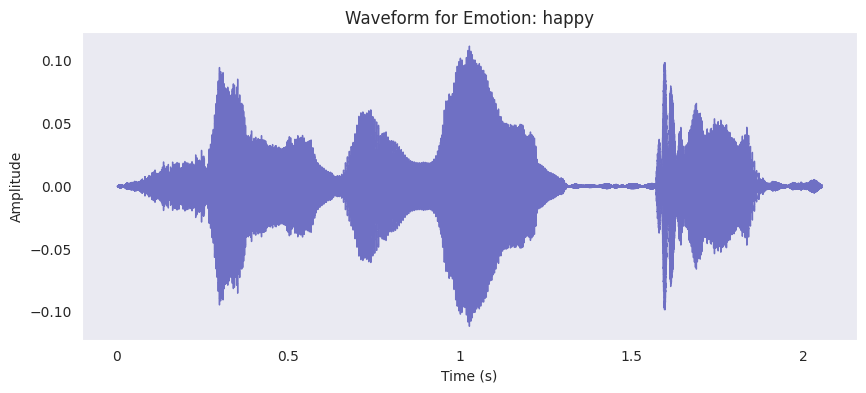

In [ ]:
# Display waveform and playback for the emotion 'happy'
display_waveform("happy")

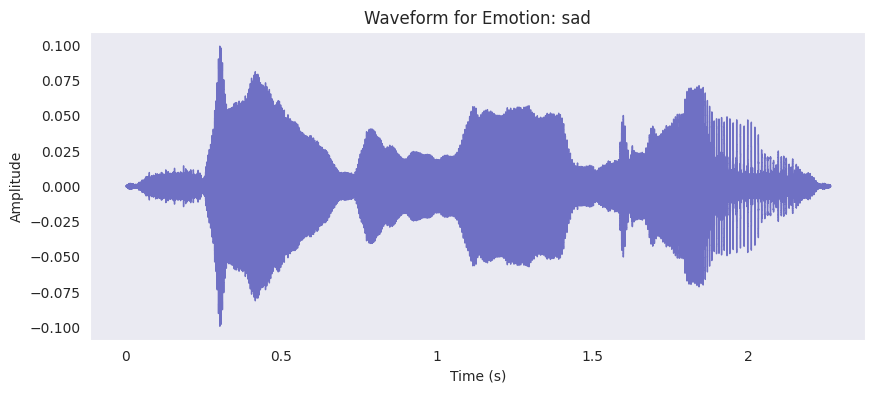

In [ ]:
# Display waveform and playback for the emotion 'sad'
display_waveform("sad")

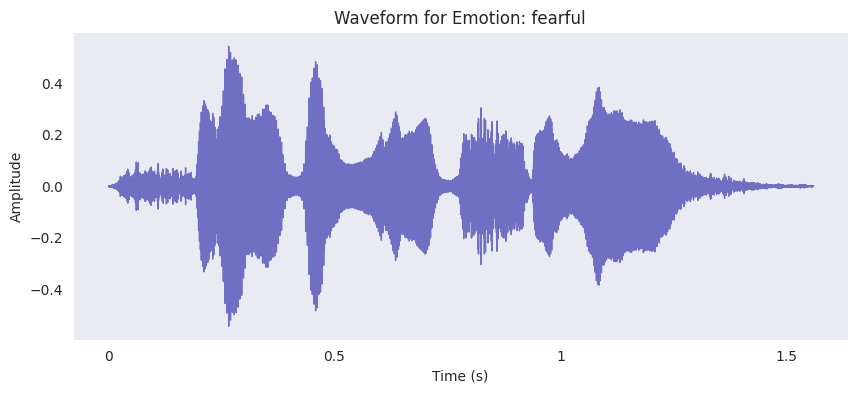

In [ ]:
# Display waveform and playback for the emotion 'fearful'
display_waveform("fearful")

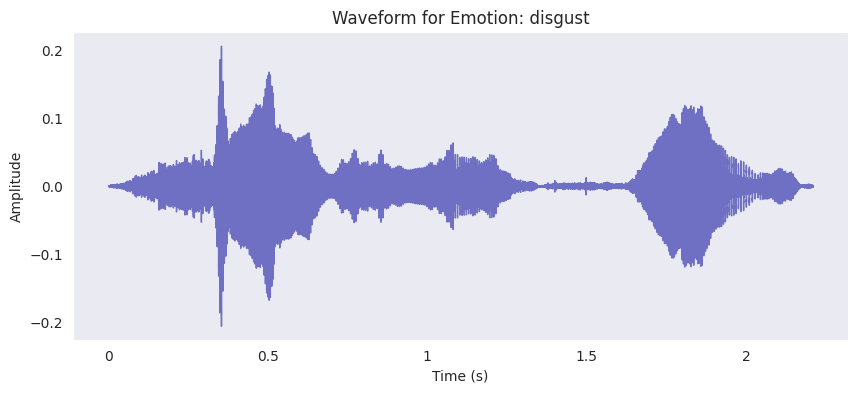

In [ ]:
# Display waveform and playback for the emotion 'disgust'
display_waveform("disgust")

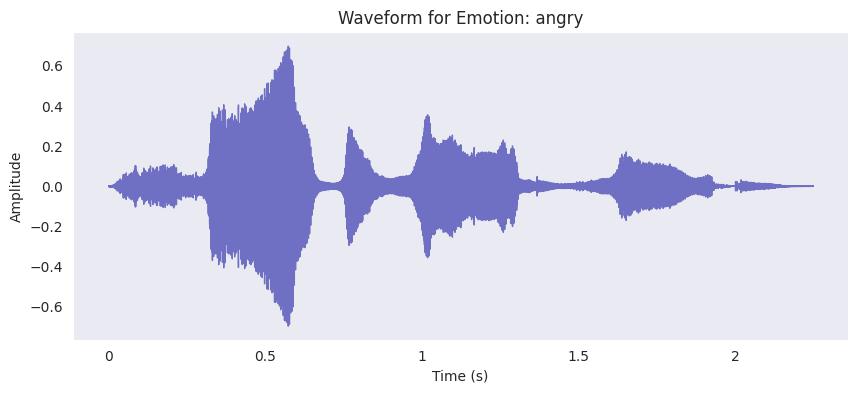

In [ ]:
# Display waveform and playback for the emotion 'angry'
display_waveform("angry")

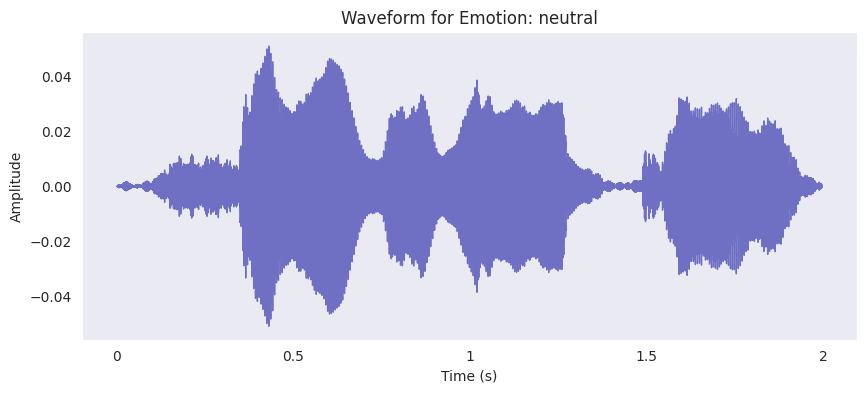

In [ ]:
# Display waveform and playback for the emotion 'neutral'
display_waveform("neutral")

**Observations and Insights:**

I believe an important step when working with an audio dataset is to listen to sample files to assess the audio quality, as this can significantly impact the model's performance.

Fortunately, the **Toronto Emotional Speech Set (TESS)** dataset proves to be an excellent choice, offering both balance and high-quality audio. The emotions are distinct and easily recognizable, even to the human ear, making it a strong foundation for this project.



---



##Feature Extraction

Feature Extraction stands as the most vital phase in this project. It involves identifying the most critical aspects of raw data, which is essential when working with audio data that is otherwise difficult to analyze. Librosa, a Python library, offers tools that make this process easier. For this project, I will focus on Mel-Frequency Cepstral Coefficients (MFCCs), Chroma, and Mel-Spectrograms.

MFCCs draw from the way the human vocal tract shapes our voice, capturing this shape as a power spectrum to help understand speech. Chroma, on the other hand, is centered on pitch, a key factor in emotion recognition, as pitch often varies with emotions like anger or sadness. Finally, the Mel-Spectrogram links sound frequencies with human perception. By aligning frequency representation with how we naturally hear, it provides an intuitive way to capture the nuances of sound, which is crucial for recognizing emotions.

In [ ]:
# Extract audio features (MFCCs, chroma, mel-spectrogram) from the file at file_path
def extract_features(file_path):
    # Load audio file with original sampling rate
    y, sr = librosa.load(file_path, sr=None)

    # Calculate MFCCs and take the mean
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Calculate chroma feature and take the mean
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)

    # Calculate mel-spectrogram and take the mean
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_mean = np.mean(mel, axis=1)

    # Concatenate the extracted features into a single feature vector
    features = np.hstack([mfccs_mean, chroma_mean, mel_mean])

    return features

In [ ]:
# Apply feature extraction to all audio files
tess_df['features'] = tess_df['path'].apply(extract_features)

In [ ]:
# Preview the first few rows of the DataFrame
tess_df.head()

,path,emotion,features
0,/content/TESS Toronto emotional speech set dat...,angry,"[-336.93613, 37.016884, -6.237579, 22.453293, ..."
1,/content/TESS Toronto emotional speech set dat...,angry,"[-322.55072, 35.303078, 0.7586141, 12.694913, ..."
2,/content/TESS Toronto emotional speech set dat...,angry,"[-334.16617, 29.397327, -9.301852, 20.028765, ..."
3,/content/TESS Toronto emotional speech set dat...,angry,"[-358.79236, 24.019863, -6.0505047, 19.446558,..."
4,/content/TESS Toronto emotional speech set dat...,angry,"[-346.84787, 26.190733, 1.9617436, 13.140652, ..."


In [ ]:
# Encode the emotion labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(tess_df['emotion'])

# Convert the integer labels to one-hot encoded vectors
y_categorical = to_categorical(y_encoded)

In [ ]:
# Convert the extracted features into a NumPy array for model input
X = np.array(tess_df['features'].tolist())

**Observations and Insights:**

After completing the feature extraction process, I aim to encode the emotion labels to enhance the model's efficiency in processing the data.



---



In [ ]:
# Split data into 70% training and 30% remaining for validation and test, stratified by emotion labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.3, stratify=y_categorical, random_state=42)

# Split the 30% remaining into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
# Print the shapes of the training and test sets for both features and labels
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1960, 153)
Shape of y_train: (1960, 7)
Shape of X_val: (420, 153)
Shape of y_val: (420, 7)
Shape of X_test: (420, 153)
Shape of y_test: (420, 7)


In [ ]:
# Expand the dimensions of the training, validation, and test feature sets to match the expected input shape for the model
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Print the new shapes of the training, validation, and test feature sets
print("New Shape of X_train:", X_train.shape)
print("New Shape of X_val:", X_val.shape)
print("New Shape of X_test:", X_test.shape)

New Shape of X_train: (1960, 153, 1)
New Shape of X_val: (420, 153, 1)
New Shape of X_test: (420, 153, 1)


**Observations and Insights:**

I proceded with splitting the dataset into training, validation and testing set with 70%, 15%, 15% stratified split based on the label to make sure the splits are also as balanced as the original.

Further more, I had to adjust the shape of the dataset so that it is aligned with the shape expected to be taken as an input by the models.



---



##Model Building

The core of this project centers on building an effective model for handling sequential data, such as audio waveforms. In my initial research, I focused on two types of models: **Recurrent Neural Networks (RNNs)** and **Convolutional Neural Networks (CNNs)**.

RNNs operate sequentially, similar to how we process written text, where each word or sentence builds on the previous one to create a continuous flow of understanding. However, RNNs often face challenges like the vanishing or exploding gradient problem. To address this issue, **Long Short-Term Memory (LSTM)** networks were developed. LSTMs extend the basic RNN structure by incorporating mechanisms to handle both short-term and long-term memories, effectively mitigating the vanishing/exploding gradient problem.

As a result, I have chosen to implement an LSTM model for this project, leveraging its ability to retain important information over extended sequences.

On the other hand, CNNs, which are often associated with image processing, offer more versatility than commonly perceived. While **2D Convolutional Neural Networks (2D CNNs)** are typically applied to tasks involving two-dimensional data like images, **1D Convolutional Neural Networks (1D CNNs)** have been adapted for sequential data, such as audio. 1D CNNs operate along a single axis, applying convolution filters across time or sequence dimensions, making them ideal for tasks like time-series analysis or audio classification.

In this project, I will explore both models. The first approach will involve implementing a **Long Short-Term Memory (LSTM)** model, and the second will focus on utilizing a **1D Convolutional Neural Network (CNN).**

### **Long Short-Term Memory (LSTM)**

In [ ]:
# Initialize a Sequential model
lstm_model = Sequential()

# Add an input layer with the shape of the training data
lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add the first LSTM layer with 128 units
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(BatchNormalization())  # Normalize activations across the batch
lstm_model.add(Dropout(0.3))  # Apply dropout for regularization

# Add the second LSTM layer with 64 units
lstm_model.add(LSTM(64))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.3))

# Fully connected (Dense) layer with Dropout
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))  # Increased Dropout rate for Dense layers to prevent overfitting

# Add the output layer with softmax activation for multi-class classification
lstm_model.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model using Adam optimizer and categorical cross-entropy loss
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 153, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 153, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 153, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,351 (474.03 KB)

 Trainable params: 120,967 (472.53 KB)

 Non-trainable params: 384 (1.50 KB)

In this model, I utilized an LSTM architecture consisting of nine layers:
- Two LSTM layers
- Each folowed by a Batch Normalization layer and a Dropout layer
- A Fully Connected (Dense) layer, also followed by a Dropout layer
- Concluding with a Dense Output layer

**Batch Normalization** plays a critical role in stabilizing and accelerating the training process. By normalizing the input to each layer, it ensures that the activations maintain a mean of 0 and a standard deviation of 1. After each LSTM layer, this normalization is applied to the output, effectively standardizing the activations before passing them on to subsequent layers. This approach not only stabilizes the model but also increases the convergence speed.

**Dropout**, as a regularization technique, prevents overfitting by randomly dropping a portion of the neurons during each training step. This encourages the network to generalize better, reducing its reliance on specific neurons. Dropout is applied after each Batch Normalization layer, and again after the Dense layer, providing an additional layer of regularization before reaching the final output.

Together, these techniques help ensure that the model avoids overfitting to the training data.


In [ ]:
# Set up early stopping
lstm_early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

# Set up model checkpoint
lstm_checkpoint = ModelCheckpoint('best_LSTM_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# Train the second model with training and validation data, using early stopping and model checkpoint callbacks
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[lstm_checkpoint, lstm_early_stopping])

Epoch 1/50
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1667 - loss: 2.3075
Epoch 1: val_accuracy improved from -inf to 0.19286, saving model to best_LSTM_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.1671 - loss: 2.3016 - val_accuracy: 0.1929 - val_loss: 1.9422
Epoch 2/50
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2157 - loss: 1.9053
Epoch 2: val_accuracy improved from 0.19286 to 0.20476, saving model to best_LSTM_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2153 - loss: 1.9057 - val_accuracy: 0.2048 - val_loss: 1.9292
Epoch 3/50
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2256 - loss: 1.8510
Epoch 3: val_accuracy improved from 0.20476 to 0.22857, saving model to best_LSTM_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2255 - loss: 1.8508 - val_accuracy: 0.2286 - val_loss: 1.9204
Epoch 4/50
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2544 - loss: 1.7910
Epoch 4: val_accuracy did not imp

### **Reporting The Best LSTM Model**

In [ ]:
# Load the best saved model
lstm_best_model = load_model('best_LSTM_model.keras')

# Evaluate the model
loss, accuracy = lstm_best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9209 - loss: 0.1790
Test Accuracy: 0.94
Test Loss: 0.17


In [ ]:
# Define custom colors for training and validation curves
train_color = '#4b0082'
val_color = '#9370DB'

# Create subplots for accuracy and loss using Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Add the training and validation accuracy traces
fig.add_trace(go.Scatter(
    x=list(range(len(lstm_history.history['accuracy']))),
    y=lstm_history.history['accuracy'],
    mode='lines',
    name='Training Accuracy',
    line=dict(color=train_color)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=list(range(len(lstm_history.history['val_accuracy']))),
    y=lstm_history.history['val_accuracy'],
    mode='lines',
    name='Validation Accuracy',
    line=dict(color=val_color)
), row=1, col=1)

# Add the training and validation loss traces
fig.add_trace(go.Scatter(
    x=list(range(len(lstm_history.history['loss']))),
    y=lstm_history.history['loss'],
    mode='lines',
    name='Training Loss',
    line=dict(color=train_color)
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=list(range(len(lstm_history.history['val_loss']))),
    y=lstm_history.history['val_loss'],
    mode='lines',
    name='Validation Loss',
    line=dict(color=val_color)
), row=1, col=2)

fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(
    title_text="Model Performance",
    showlegend=True,
    height=500,
    width=1350
)

fig.show()

**Observations and Insights:**

**Model Accuracy:**
- As shown in the graph, the training accuracy starts at 0.2 at the beginning of the epochs and gradually increases over the course of more than 40 epochs, reaching 0.9 by the end.

- Similarly, the validation accuracy follows the same overall trend of continuous improvement, albeit with more fluctuations. It eventually converges with the training accuracy, reaching 0.9 by the end of the training process.

**Model Loss:**

- The training loss begins at 2.0 at the start of the epochs and gradually decreases as the epochs progress, reaching 0.2 by the final epoch. This reflects the model's ability to minimize errors on the training set.

- The validation loss, however, shows sharp spikes at various points throughout the epochs before finally converging with the training loss at 0.3 by the end.

Overall, despite the fluctuations, the model achieves reasonable accuracy and loss by the end of the training process, which indicates that it is learning effectively but could benefit from further optimization.

In [ ]:
# Predict the class labels for the test set
lstm_y_pred = lstm_best_model.predict(X_test)

# Convert predicted and true labels to class indices
lstm_y_pred_classes = np.argmax(lstm_y_pred, axis=1)
lstm_y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(lstm_y_true, lstm_y_pred_classes, target_names=label_encoder.classes_))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        60
     disgust       0.93      0.95      0.94        60
     fearful       0.95      1.00      0.98        60
       happy       1.00      0.75      0.86        60
     neutral       0.95      0.98      0.97        60
         sad       0.98      0.97      0.97        60
   surprised       0.80      0.93      0.86        60

    accuracy                           0.94       420
   macro avg       0.95      0.94      0.94       420
weighted avg       0.95      0.94      0.94       420



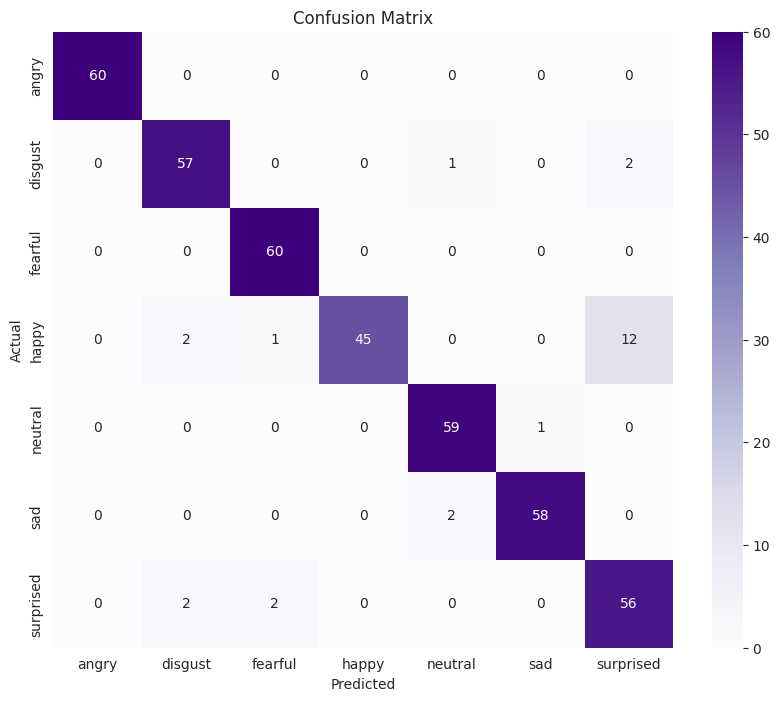

In [ ]:
# Define a color palette
purple_cmap = sns.color_palette("Purples", as_cmap=True)

# Plot confusion matrix with the purple color palette
cm = confusion_matrix(lstm_y_true, lstm_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=purple_cmap, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

**Observations and Insights:**

From the confusion matrix above, we can see that the model generally performs well in recognizing most emotions accurately, with a few exceptions

- First, the model tends to confuse "Happy" with "Surprised", which may be somewhat understandable, considering these emotions could share similar pitch tones.

- Second, the model appears to struggle with correctly classifying the "Surprised", and "Disgust" emotions. In most cases, it misclassifies "Surprised" as "Disgust" or "Fearful", which applies to the "Happy" emotion as well but in fewer instcances that are classified as "Fearful". Additionally, it misclassifies "Disgust" as "Surprised".
This is harder to justify, as these are very distinct emotions with notably different pitch tones.

This issue warrants further attention in future iterations, as it could be tied to the feature extraction process, where potentially valuable information was not captured correctly, thus affecting the model's performance. Alternatively, this could point to a flaw within the model's architecture or learning process. Therefore, exploring alternative models, such as a CNN, would be a worthwhile endeavour.

In [ ]:
# Convert them to categorical label indices
lstm_y_pred_labels = np.argmax(lstm_y_pred, axis=1)
lstm_y_test_labels = np.argmax(y_test, axis=1)

# Inverse transform to get the original categorical labels
lstm_y_pred_categories = label_encoder.inverse_transform(lstm_y_pred_labels)
lstm_y_test_categories = label_encoder.inverse_transform(lstm_y_test_labels)

# Create a DataFrame to compare the predicted and actual categorical labels
lstm_results_df = pd.DataFrame({
    'Predicted Labels': lstm_y_pred_categories,
    'Actual Labels': lstm_y_test_categories
})

# Preview the first few rows of the LSTM DataFrame
lstm_results_df.head()

,Predicted Labels,Actual Labels
0,sad,sad
1,surprised,disgust
2,neutral,neutral
3,neutral,neutral
4,angry,angry


In [ ]:
# Randomly display 5 rows from the LSTM results DataFrame
display(lstm_results_df.sample(n=5))

,Predicted Labels,Actual Labels
136,neutral,neutral
313,sad,sad
53,angry,angry
287,happy,happy
245,angry,angry


In [ ]:
# Randomly sample 3% of rows from the LSTM results DataFrame
lstm_results_df.sample(frac=0.05)

,Predicted Labels,Actual Labels
1,surprised,disgust
22,surprised,surprised
287,happy,happy
408,angry,angry
297,happy,happy
275,disgust,disgust
54,disgust,disgust
187,surprised,surprised
336,fearful,fearful
201,neutral,sad


**Observations and Insights:**

In these results, we can observe a few instances where the model misclassifies certain labels. One example is the model misclassifying "Happy" as "Surprised", as previously mentioned. Additionally, we see other instances where the model misclassifies "Disgust" as "Surprised", "Surprised" as "Disgust",and "Neutral" as "Sad", which, again, is difficult to justify. According to the confusion matrix, the misclassification occurs in two instances for "Neutral", and occurs in two instances for both "Surprised" and "Disgust", which further reinforces the concerns raised about the model's performance.



---



### **Convolutional Neural Network (CNN):** **1 Dimensional Convolutional Layer (Conv1D)**

Before building the CNN model, it is important to clear the backend to ensure resources are freed, potential conflicts are avoided, and any leftover state from the previous model does not interfere with the new one.

In [ ]:
# Clear the backend session
backend.clear_session()

# Set seeds for reproducibility
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initialize a Sequential model
cnn_model = Sequential()

# Add an input layer with the shape of the training data
cnn_model.add(Input(shape=(X_train.shape[1], 1)))

# First Conv1D layer with Batch Normalization
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())  # Normalize activations across the batch
cnn_model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second Conv1D layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.3))

# Flattening the output to feed into Dense layers
cnn_model.add(Flatten())

# Fully connected (Dense) layer with Dropout
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))  # Increased Dropout rate for Dense layers to prevent overfitting

# Add the output layer with softmax activation for multi-class classification
cnn_model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model using Adam optimizer and categorical cross-entropy loss
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 151, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 151, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 151, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 149, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 149, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 149, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         610,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 617,543 (2.36 MB)

 Trainable params: 617,351 (2.36 MB)

 Non-trainable params: 192 (768.00 B)

In this model, I utilized a 1D CNN architecture consisting of ten layers:
- Two 1D CNN layers
- Each folowed by a Batch Normalization layer and a Dropout layer
- A Flattening layer to prepare the output from the Convolutional layers for the Fully Connected layer
- A Fully Connected (Dense) layer, followed by a Dropout layer
- Concluding with a Dense Output layer

After each 1D Convolutional layer, **Batch Normalization** is applied to standardize the output, ensuring that the activations remain stable with a mean of 0 and a standard deviation of 1. This helps maintain the stability of the model during training and ensures faster convergence.

**Dropout** is applied after both the Batch Normalization and Fully Connected layers. This setup helps prevent overfitting, particularly when working with a large number of trainable parameters, as seen in the Dense layer, which contains over 600,000 parameters. By randomly dropping neurons during training, Dropout adds an extra layer of regularization, helping the model to generalize more effectively.

In [ ]:
# Set up early stopping
cnn_early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

# Set up model checkpoint
cnn_checkpoint = ModelCheckpoint('best_cnn_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# Train the second model with training and validation data, using early stopping and model checkpoint callbacks
cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[cnn_checkpoint, cnn_early_stopping])

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3420 - loss: 1.9681
Epoch 1: val_accuracy improved from -inf to 0.66429, saving model to best_cnn_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.3437 - loss: 1.9604 - val_accuracy: 0.6643 - val_loss: 1.0474
Epoch 2/50
60/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 0.9549
Epoch 2: val_accuracy improved from 0.66429 to 0.79048, saving model to best_cnn_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6263 - loss: 0.9525 - val_accuracy: 0.7905 - val_loss: 0.7762
Epoch 3/50
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7413 - loss: 0.6813
Epoch 3: val_accuracy improved from 0.79048 to 0.91905, saving model to best_cnn_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7418 - loss: 0.6797 - val_accuracy: 0.9190 - val_loss: 0.4511
Epoch 4/50
58/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.5350
Epoch 4: val_accuracy improved from 0.91

### **Reporting The Best CNN Model**

In [ ]:
# Load the best saved model
cnn_best_model = load_model('best_cnn_model.keras')

# Evaluate the model
loss, accuracy = cnn_best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9925 - loss: 0.0388
Test Accuracy: 0.99
Test Loss: 0.05


In [ ]:
# Define custom colors for training and validation curves
train_color = '#4b0082'
val_color = '#9370DB'

# Create subplots for accuracy and loss using Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Model Accuracy", "Model Loss"))

# Add the training and validation accuracy traces
fig.add_trace(go.Scatter(
    x=list(range(len(cnn_history.history['accuracy']))),
    y=cnn_history.history['accuracy'],
    mode='lines',
    name='Training Accuracy',
    line=dict(color=train_color)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=list(range(len(cnn_history.history['val_accuracy']))),
    y=cnn_history.history['val_accuracy'],
    mode='lines',
    name='Validation Accuracy',
    line=dict(color=val_color)
), row=1, col=1)

# Add the training and validation loss traces
fig.add_trace(go.Scatter(
    x=list(range(len(cnn_history.history['loss']))),
    y=cnn_history.history['loss'],
    mode='lines',
    name='Training Loss',
    line=dict(color=train_color)
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=list(range(len(cnn_history.history['val_loss']))),
    y=cnn_history.history['val_loss'],
    mode='lines',
    name='Validation Loss',
    line=dict(color=val_color)
), row=1, col=2)

fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(
    title_text="Model Performance",
    showlegend=True,
    height=500,
    width=1350
)

fig.show()

**Observations and Insights:**

**Model Accuracy:**
- In this graph, the model's training accuracy starts around 0.4 and improves steadily, stabilizing near 1.0 by the end of the epochs. This indicates that the model performs well on the training data.

- The validation accuracy, starting at approximately 0.7, follows a similar trajectory, steadily increasing and closely tracking the training accuracy curve until both approach 1.0. This suggests that the model generalizes well to unseen data, with a smooth improvement in performance.


**Model Loss:**

- As with accuracy, the training loss follows a steady decline, beginning at 1.4 and decreasing throughout the epochs, eventually reaching 0.1.

- The validation loss mirrors this trend, starting at 1.0 and decreasing steadily until it converges with the training loss at around 0.03 by the final epoch. This indicates that the model's performance on both training and validation data aligns well, with minimal fluctuations.

Overall, the CNN model shows superior performance compared to the LSTM, particularly in terms of generalizability and smooth, consistent learning, with fewer fluctuations in the validation metrics.



---



In [ ]:
# Predict the class labels for the test set
cnn_y_pred = cnn_best_model.predict(X_test)

# Convert predicted and true labels to class indices
cnn_y_pred_classes = np.argmax(cnn_y_pred, axis=1)
cnn_y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(cnn_y_true, cnn_y_pred_classes, target_names=label_encoder.classes_))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        60
     disgust       0.98      1.00      0.99        60
     fearful       1.00      1.00      1.00        60
       happy       0.97      0.98      0.98        60
     neutral       1.00      1.00      1.00        60
         sad       1.00      1.00      1.00        60
   surprised       0.98      0.95      0.97        60

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420



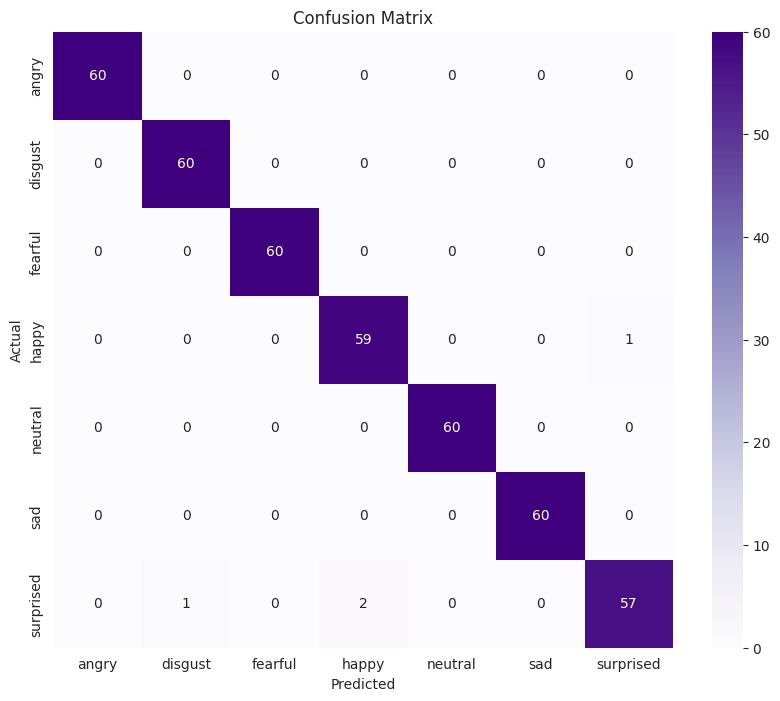

In [ ]:
# Define a color palette
purple_cmap = sns.color_palette("Purples", as_cmap=True)

# Plot confusion matrix with the purple color palette
cm = confusion_matrix(cnn_y_true, cnn_y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap=purple_cmap, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

**Observations and Insights:**

The confusion matrix above demonstrates that the CNN model performs better in classifying emotions, with fewer instances of misclassification compared to the LSTM model.
There are still some cases where the model misclassifies emotions, two instances where it classifies "Surprised" as "Happy", only one instance where it misclassifies "Happy" as "Surprised", and only one instance where it misclassifies "Surprised" as "Disgust". This could again point to a potential issue with the feature extraction phase.

However, the CNN model's overall performance is smoother, handling emotion classification with greater accuracy and fewer confusing misclassification cases than the LSTM model.



---



In [ ]:
# Convert them to categorical label indices
cnn_y_pred_labels = np.argmax(cnn_y_pred, axis=1)
cnn_y_test_labels = np.argmax(y_test, axis=1)

# Inverse transform to get the original categorical labels
cnn_y_pred_categories = label_encoder.inverse_transform(cnn_y_pred_labels)
cnn_y_test_categories = label_encoder.inverse_transform(cnn_y_test_labels)

# Create a DataFrame to compare the predicted and actual categorical labels
cnn_results_df = pd.DataFrame({
    'Predicted Labels': cnn_y_pred_categories,
    'Actual Labels': cnn_y_test_categories
})

# Preview the first few rows of the CNN DataFrame
cnn_results_df.head()

,Predicted Labels,Actual Labels
0,sad,sad
1,disgust,disgust
2,neutral,neutral
3,neutral,neutral
4,angry,angry


In [ ]:
# Randomly display 5 rows from the CNN results DataFrame
display(cnn_results_df.sample(n=5))

,Predicted Labels,Actual Labels
145,neutral,neutral
334,fearful,fearful
175,disgust,disgust
369,happy,happy
416,fearful,fearful


In [ ]:
# Randomly sample 3% of rows from the CNN results DataFrame
cnn_results_df.sample(frac=0.05)

,Predicted Labels,Actual Labels
66,neutral,neutral
316,neutral,neutral
233,disgust,disgust
273,disgust,disgust
398,fearful,fearful
200,disgust,disgust
307,angry,angry
262,surprised,surprised
187,surprised,surprised
134,sad,sad


**Observations and Insights:**

From this section, we can observe several random instances displayed, with no misclassifications visible, as they occur only in a few cases in the CNN model's overall performance.



---



##Conclusion

Through this project, I had the opportunity to explore several key areas while navigating the complexities of working with audio data, which revealed some important factors that significantly impacted the results:

• **Audio Quality:** The quality and clarity of the audio files were crucial. Low-quality files disrupt the feature extraction phase, leading to diminished model performance. While features can still be extracted from unclear audio, their accuracy pales compared to higher-quality sources. Much like how humans struggle with distorted audio, models processing such data face similar challenges.

• **Feature extraction:** This phase was vital, as it transformed audio files into numerical representations the model could interpret. The accuracy of these features directly impacted the model's ability to distinguish between similar emotional expressions. In this project, I observed that the LSTM model faced notable challenges in classifying certain emotions. For example, the model confused "Happy" with "Surprise", which could be explained by the overlap in certain audio features common to both emotions. More concerning was its misclassification of "Surprise" as "Disgust" and vice versa, pointing to potential deeper issues in how these emotions were represented through the extracted features.

At this point, it seems appropriate to draw some conclusions about the models. Throughout my experimentation with Long Short-Term Memory (LSTM) and 1D Convolutional Neural Network (1D CNN) models, it became clear that the 1D CNN outperformed the LSTM. This naturally raises questions, particularly, “Why?” While I may not have definitive answers, I can propose several possible points for consideration:

**Long Short-Term Memory (LSTM):**

- First, LSTMs are known for their relatively complex structure. This might offer some insight into its performance in terms of accuracy and loss curves, especially given that the dataset used consists of 2800 short audio files, each under three seconds in length, and featuring simple, clear sentences with evident emotional expression. The model's complexity might have been excessive for such a dataset, possibly contributing to the fluctuations in performance and hinting at overfitting.

- Second, LSTMs are particularly adept at capturing long-term dependencies. Since they are designed to retain crucial information from earlier points in a sequence, this capability is often essential for interpreting lengthy sequences of data. Given that the dataset comprised brief, straightforward audio clips, this could have influenced the model's performance.


**1D Convolutional Neural Network (1D CNN):**

- First, 1D CNNs, in general, feature a simpler architecture compared to LSTMs, and this may explain their superior performance here. It seems the model's level of complexity was well-suited to the simplicity of the dataset, which likely contributed to smoother convergence.

- Second, 1D CNNs excel at capturing short-term dependencies, a trait that aligned well with the simplicity of the dataset in terms of both length and content. This compatibility likely had a positive impact on the model's performance.

In light of these findings, several points come to mind that spark further curiosity. Since LSTMs are proficient in handling long-term dependencies, it would be interesting to test the model on more complex sequences, such as longer audio clips, perhaps conversations, interviews, or complex musical compositions like classical pieces or multi-instrumental songs. Observing the LSTM's behaviour with such data could provide valuable insights.

This project has broadened my understanding of how to approach similar cases, particularly in terms of balancing accuracy and complexity. I witnessed firsthand the effects of applying a complex model to a relatively simple dataset, which resulted in a model prone to overfitting and exhibiting difficulties in converging smoothly. The contrast in performance between the LSTM and the simpler 1D CNN further highlighted this trade-off.

All in all, this project has provided valuable insights and raised new questions that invite further exploration. While I continue to reflect on these findings, this journey was enjoyable and has deepened my understanding and sparked even greater curiosity.
